# Damage Propagation Modeling for Aircraft Engine Run-to-Failure Simulation

## 1. Problem Definition:
### Prognostics
- prognostics 는 부품의 남은 유효수명(RUL: Remaining Useful Life)을 추정하는 것이다.
  (RUL 은 시간 또는 사이클의 시간 단위로로 표시)
- prognostics 는 시스템 건강 관리(SHM:System Health Management)의 핵심이다.
  남은 수명을 신뢰성 있게 추정하면, 예기치 않은 유지 보수를 피하고 장비 사용을 극대화하는 등
  상당한 비용 절감과 운영 안정성 개선 가능하다.

## 2. Data Collection:
- 데이터 기반 예지 측면에서 고장까지(run-to-failure) 도달하는 과정을 담은 데이터 세트가 필요하다.
- 손상 모델링 과정에서 중요한 요구사항은 건강 관련 파라미터의 입력 변화를 허용하고,
  그에 따른 출력 센서 측정값을 기록할 수 있는 적합한 시스템이다. 
- C-MAPSS(Commercial Modular Aero-Propulsion System Simulation)는 이러한 요구사항을 충족한다.

### 2-1. C-MAPSS
- C-MAPSS 는 대형 상업용 터보팬 엔진을 현실적으로 시뮬레이션 할 수 있는 도구이다.
- 사용자가 운영 프로필, 폐루프 제어기, 완경 조건 등에 대한 원하는값을 입력할 수 있도록 여러 입력 파라미터가 존재한다. 
  (C-MAPSS 에는 14의 입력값 존재, 이 논문에서는 폐루프 구성만을 사용)
- Table 1. C-MAPSS 입력값: 시뮬레이션된 엔진의 5개 회전 부품 중 어느 부품에서든 다양한 열화 시나리오를
  시뮬레이션하기 위한 입력값. 예를 들어, HPC 열화를 시뮬레이션하기 위해 HPC 유량 및 효율 수정값 사용  
  ![table1](./img/table1.jpg)  
- Table 2. C-MAPSS 출력은 시스템 응답을 측정하기 위한 것으로 마진은 건강 지수 계산에만 사용되었으며,  
  참가자들에게 명시적으로 제공되지 않았다.  
  ![table2-1](./img/table2-1.jpg)  
  ![table2-2](./img/table2-2.jpg)  

#### 
- 데이터 세트1과 2는 HPC 의 성능 저하를 갖는다.
- HPC 의 성능 저하는 압축기에서 공기를 충분히 압축하지 못하거나, 효율적으로 압축하지 못하는 현상이다.  
    - 원인: 블레이드 손상 또는 오염, 블레이드 간극 증가, 베어링 문제, 열 변형
    - 증상: 압축 비율 감소, 추력 감소, 연료 효율 저하, 과열 및 손상 위험 증가 

### 2-2. Dataset Description
- 항공기 가스터빈 엔진에서 일반적으로 사용 가능한 센서 측정값에서 얻은 시계열 데이터이다.
- 총 4개의 데이터셋으로 구성되어 있으며, 각 데이터셋은 서로 다른 실험 환경에서 측정되었다.  
    - Traning Engines, Test Engines 는 훈련, 테스트 데이터를 수집한 엔진의 수이다.
    - Fault Modes 는 고장 유형이고, Conditions 는 데이터 생성 시 설정한 조건의 수이다.

#### 2-2-1. train_FD00X.txt
- 예측 모델을 훈련하는 데 사용한다. 훈련 데이터는 엔진의 상태를 시간에 따라서 설명하는 판독값, 운영 변수 및
  기타 관련 특성을 포함한다.
- 훈련 파일에는 RUL 값 또는 고장을 나타내는 지표가 포함되어 있어 모델이 특성과 RUL 간의 관계를 학습할 수 있다.
- train_FD00X 는 고장날 때 까지의 데이터를 포함하고 있다. 따라서 각 엔진의 마지막 사이클의 RUL 값은 0이다.
##### 각 칼럼의 의미
1. unit_number: 엔진의 고유 번호(ID)
2. time_in_cycles: 엔진이 작동한 사이클 수(시간 단위)
3. operational_setting1 ~ 3: 운영 설정값
   (ex: 압축기 관련 변수, 터빈 관련 변수, 연료 관련 변수)
4. sensor_1 ~ 21: 센서 판독값
   (ex: 압력, 온도 등)    
     ![table4](./img/table4.jpg)
##### 각 사이클 당 한번의 센서 데이터만 제공되는 이유
1. 사이클의 정의와 데이터 수집 방식
- 사이클 기반 데이터 수집: C-MAPSS 데이터셋은 엔진의 작동을 사이클 단위로 나누어 기록한다.
  각 사이클은 엔진이 시작부터 정지까지의 과정을 포함하며, 이 과정에서 특정 시점의 데이터를 기록한다.
- 주기적인 데이터 측정: 엔진의 센서들은 지속적으로 데이터를 수집하지만,
  데이터셋에서는 각 사이클의 특정 시점의 데이터만 기록된다.
  이는 데이터의 양을 줄이고, 특정 사이클의 대표적인 상태를 나타내기 위함이다.

2. 데이터 통합의 필요성
- 데이터 압축 및 요약: 엔진이 작동하는 동안 수집되는 모든 센서 데이터를 기록하면 데이터의 양이 방대해지기 때문에,
  각 사이클의 대표적인 값만 선택하여 기록한다.
  이렇게하면 데이터 분석과 모델링이 더 용이해진다.
- 고정된 측정 시점: 각 사이클마다 설정된 고정된 측정 시점에서의 센서 데이터를 기록함으로써,  
  특정 시점의 엔진 상태를 비교할 수 있는 기준을 제공한다.
  
3. 센서 데이터의 특성
- 다양한 센서: C-MAPSS 데이터셋은 여러 센서로부터 다양한 데이터를 수집한다.
  예를 들어 압력, 온도, RPM, 연료 흐름 등 다양한 센서가 있으며, 이러한 센서들이 주기적으로 데이터를 수집한다.
- 상태 변화 반영: 각 사이클 내에서 센서 데이터는 엔진의 상태 변화에 따라 다르게 측정되며,
  사이클의 시작과 끝에 해당하는 특정 지점에서의 값을 기록하여 엔진 상태를 나타낸다.
  
4. 모델링과 분석의 용이성
- 모델 학습: 각 사이클 당 한 번의 센서 데이터로도 충분히 모델 학습에 필요한 정보를 제공할 수 있다.
  이렇게 하면 모델이 다양한 사이클과 작동 조건을 학습하는 데 필요한 데이터 포인트를 확보할 수 있다.
- 예측 유지보수: 각 사이클의 대표적인 데이터를 통해 엔진의 고장 예측 및 유지보수 전략을 수립할 수 있다.

5. 결론
- C-MAPSS 데이터셋에서 각 사이클당 한 번의 센서 데이터만 기록되는 이유는 데이터 수집의 효율성,
  데이터의 요약 및 특정 시점에서의 엔진 상태를 반영하기 위함이다.
- 이렇게 수집된 데이터는 머신러닝 모델의 학습에 충분한 정보를 제공하며,
  엔진 성능 분석과 고장 예측을 위한 유용한 기초 자료가 된다.

In [1]:
import numpy as np
import pandas as pd

# define filepath to read dataset
data_path = './dataset/'

# define column names for easy indexing
index_names = ['unit_number', 'time_in_cycles']
setting_names = ['operational_setting1', 'operational_setting2', 'operational_setting3']
sensor_names = ['s_{}'.format(i) for i in range(1,22)]
col_names = index_names + setting_names + sensor_names

# read data
train_FD001 = pd.read_csv((data_path+'train_FD001.txt'), sep=r'\s+', header=None, names=col_names)
display(train_FD001)
# train_FD001.to_csv('train_FD001.csv', index=False)

,unit_number,time_in_cycles,operational_setting1,operational_setting2,operational_setting3,s_1,s_2,s_3,s_4,s_5,...,s_12,s_13,s_14,s_15,s_16,s_17,s_18,s_19,s_20,s_21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,...,519.49,2388.26,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735
20627,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,...,519.68,2388.22,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594
20628,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,...,520.01,2388.24,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333
20629,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,...,519.67,2388.23,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640


#### 2-2-2. test_FD00X.txt
- 예측 모델의 성능을 평가하는데 사용된다. 테스트 데이터는 센서 판독 값과 엔진의 운영 조건을 포함하고 있지만,
  RUL 값은 포함되어 있지 않다.
- 참가자들은 이 데이터를 사용하여 RUL 을 예측하고, 실제 RUL 값과 비교하여 모델의 성능을 평가할 수 있다.

##### 각 칼럼의 의미
1. unit_number: 엔진의 고유 번호(ID)
2. time_in_cycles: 엔진이 작동한 사이클 수(시간 단위)
3. operational_setting1 ~ 3: 운영 설정값
   (압축기 관련 변수, 터빈 관련 변수, 연료 관련 변수)
4. sensor_1 ~ 21: 센서 판독값

In [2]:
test_FD001 = pd.read_csv((data_path+'test_FD001.txt'), sep=r'\s+', header=None, names=col_names)

#### 2-2-3. RUL_FD00X.txt
- test_FD001 을 활용한 예측 작업의 목표변수를 제공한다. RUL 값은 엔진이 고장나기 전까지 얼마나 더 작동할 수 있는지를 나타낸다.

In [3]:
RUL_FD001 = pd.read_csv((data_path+'RUL_FD001.txt'), sep=r'\s+', header=None, names=['RUL'])
# display(RUL_FD001)
# RUL_FD001.to_csv('RUL_FD001.csv', index=False)

### 2-3. Ready to train dataset
- 엔진 ID 별로 하나의 RUL 을 가지는 시계열 데이터이다.
- 엔진 ID 는 최소 1 에서 최대 362 까지의 각기 다른 사이클 횟수를 가진다.
- 엔진의 잔여 유효 수명은 최소 7 사이클에서 145 사이클 까지이다.
####
- 각 엔진 ID 의 마지막 time-cycle 에서 RUL 만큼 더 동작하면 failure 이다.
- 그럼 역산으로 각 time-cycle의 RUL 을 추론할 수 있다.
- 따라서 데이터베이스의 아이템 세트가 꼭 100개 씩 들어갈 필요는 없다.

In [4]:
print("train_data:", train_FD001.shape)
print("test_data:", test_FD001.shape)
print("target_data:", RUL_FD001.shape)
print("-" * 26)
print("train_data_id_unique:", len(train_FD001['unit_number'].unique()))
print("time_in_cycles_min:", min(train_FD001['time_in_cycles'].unique()))
print("time_in_cycles_max:", max(train_FD001['time_in_cycles'].unique()))

train_data: (20631, 26)
test_data: (13096, 26)
target_data: (100, 1)
--------------------------
train_data_id_unique: 100
time_in_cycles_min: 1
time_in_cycles_max: 362


In [5]:
# 각 unit_number 별 max_cycle 계산
max_cycles = train_FD001.groupby('unit_number')['time_in_cycles'].max().reset_index()
max_cycles.columns = ['unit_number', 'max_cycles']
display(max_cycles)

,unit_number,max_cycles
0,1,192
1,2,287
2,3,179
3,4,189
4,5,269
...,...,...
95,96,336
96,97,202
97,98,156
98,99,185


In [6]:
# # max_cycle 에 RUL_FD001 을 더하여 전체 수명 계산
# max_cycles['max_life'] = max_cycles['max_cycles'] + RUL_FD001['RUL']
# display(max_cycles)

In [7]:
# train_FD001 에 max_cycles 정보를 병합
train = train_FD001.merge(max_cycles[['unit_number', 'max_cycles']], on='unit_number', how='left')
display(train)

,unit_number,time_in_cycles,operational_setting1,operational_setting2,operational_setting3,s_1,s_2,s_3,s_4,s_5,...,s_13,s_14,s_15,s_16,s_17,s_18,s_19,s_20,s_21,max_cycles
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,192
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,192
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,192
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,192
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,192
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,...,2388.26,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735,200
20627,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,...,2388.22,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594,200
20628,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,...,2388.24,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333,200
20629,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,...,2388.23,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640,200


In [8]:
# 각행의 RUL 계산
train['RUL'] = train['max_cycles'] - train['time_in_cycles']
display(train)

,unit_number,time_in_cycles,operational_setting1,operational_setting2,operational_setting3,s_1,s_2,s_3,s_4,s_5,...,s_14,s_15,s_16,s_17,s_18,s_19,s_20,s_21,max_cycles,RUL
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,192,191
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,192,190
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,192,189
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,192,188
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,192,187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,...,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735,200,4
20627,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,...,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594,200,3
20628,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,...,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333,200,2
20629,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,...,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640,200,1


## 3. EDA, Exploratory Data Analysis
### 3-1. Data Cleanin
#### unit_numbers
- unit_numbers 는 각 엔진의 고유 식별자이다. 이 값은 엔진을 구분하기 위한 정보일 뿐이며,  
  고유한 식별자 자체는 모델이 학습할 때 예측에 유용한 정보가 아니다.
- 머신러닝 모델은 unit_numbers 같은 식별자에 의존하게 되면 과적합될 가능성이 있다.
#### time_cycles
- time_cycles 는 각 엔진의 현재 사이클을 나타내는 정보이다.
- 이는 엔진의 경과 시간 또는 사용 기간을 나타내므로, RUL 을 예측할 때 직접적인 시간 정보로 사용된다.
- 하지만 RUL은 남은 사용 수명을 예측하는 것이 목표이므로, time_cycles 를 독립 변수로 모델에 포함하면  
  모델이 단순히 time_cycles 정보를 이용해 RUL을 예측하려는 경향이 생길 수 있다.
- 이는 목표와 독립 변수의 상관 관계를 강하게 만들어 예측 성능에 영향을 미칠 수 있다.
##### 따라서 unit_numbers 와 time_cycles 는 제거하고 회귀 분석을 진행한다.

In [9]:
train_info = train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20631 entries, 0 to 20630
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   unit_number           20631 non-null  int64  
 1   time_in_cycles        20631 non-null  int64  
 2   operational_setting1  20631 non-null  float64
 3   operational_setting2  20631 non-null  float64
 4   operational_setting3  20631 non-null  float64
 5   s_1                   20631 non-null  float64
 6   s_2                   20631 non-null  float64
 7   s_3                   20631 non-null  float64
 8   s_4                   20631 non-null  float64
 9   s_5                   20631 non-null  float64
 10  s_6                   20631 non-null  float64
 11  s_7                   20631 non-null  float64
 12  s_8                   20631 non-null  float64
 13  s_9                   20631 non-null  float64
 14  s_10                  20631 non-null  float64
 15  s_11               

- Non-Null Count 에서 결측치가 없는 것을 확인
- 센서 측정값 Dtype 통일

In [10]:
train = train.astype({'s_17': 'float64', 's_18': 'float64'})

#### staticstics

In [11]:
train_setting_statistics = train[setting_names].describe()
display(train_setting_statistics)

,operational_setting1,operational_setting2,operational_setting3
count,20631.000000,20631.000000,20631.0
mean,-0.000009,0.000002,100.0
std,0.002187,0.000293,0.0
min,-0.008700,-0.000600,100.0
25%,-0.001500,-0.000200,100.0
50%,0.000000,0.000000,100.0
75%,0.001500,0.000300,100.0
max,0.008700,0.000600,100.0


In [12]:
train_sensor_statistics = train[sensor_names].describe().T 
display(train_sensor_statistics)

,count,mean,std,min,25%,50%,75%,max
s_1,20631.0,518.670000,0.000000e+00,518.6700,518.6700,518.6700,518.6700,518.6700
s_2,20631.0,642.680934,5.000533e-01,641.2100,642.3250,642.6400,643.0000,644.5300
s_3,20631.0,1590.523119,6.131150e+00,1571.0400,1586.2600,1590.1000,1594.3800,1616.9100
s_4,20631.0,1408.933782,9.000605e+00,1382.2500,1402.3600,1408.0400,1414.5550,1441.4900
s_5,20631.0,14.620000,1.776400e-15,14.6200,14.6200,14.6200,14.6200,14.6200
s_6,20631.0,21.609803,1.388985e-03,21.6000,21.6100,21.6100,21.6100,21.6100
s_7,20631.0,553.367711,8.850923e-01,549.8500,552.8100,553.4400,554.0100,556.0600
s_8,20631.0,2388.096652,7.098548e-02,2387.9000,2388.0500,2388.0900,2388.1400,2388.5600
s_9,20631.0,9065.242941,2.208288e+01,9021.7300,9053.1000,9060.6600,9069.4200,9244.5900
s_10,20631.0,1.300000,0.000000e+00,1.3000,1.3000,1.3000,1.3000,1.3000


In [13]:
train.corr()

,unit_number,time_in_cycles,operational_setting1,operational_setting2,operational_setting3,s_1,s_2,s_3,s_4,s_5,...,s_14,s_15,s_16,s_17,s_18,s_19,s_20,s_21,max_cycles,RUL
unit_number,1.000000,0.078753,-0.017895,-0.006197,NaN,NaN,0.014133,0.012621,0.026116,NaN,...,-0.059473,0.022486,NaN,0.013513,NaN,NaN,-0.020589,-0.016465,0.216858,0.078753
time_in_cycles,0.078753,1.000000,-0.004527,0.016132,NaN,NaN,0.549898,0.543947,0.624577,NaN,...,0.370324,0.588676,NaN,0.566995,NaN,NaN,-0.583597,-0.585923,0.363152,-0.736241
operational_setting1,-0.017895,-0.004527,1.000000,0.011660,NaN,NaN,0.009030,-0.005651,0.009544,NaN,...,-0.004469,0.007652,NaN,0.002599,NaN,NaN,-0.005713,-0.014559,-0.010636,-0.003198
operational_setting2,-0.006197,0.016132,0.011660,1.000000,NaN,NaN,0.007266,0.009068,0.014673,NaN,...,-0.006310,0.014156,NaN,0.012280,NaN,NaN,-0.010554,-0.007846,0.019530,-0.001948
operational_setting3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
s_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
s_2,0.014133,0.549898,0.009030,0.007266,NaN,NaN,1.000000,0.602610,0.714949,NaN,...,0.179752,0.675975,NaN,0.629886,NaN,NaN,-0.661841,-0.668050,-0.077909,-0.606484
s_3,0.012621,0.543947,-0.005651,0.009068,NaN,NaN,0.602610,1.000000,0.678413,NaN,...,0.237137,0.639921,NaN,0.600017,NaN,NaN,-0.625941,-0.633901,-0.055863,-0.584520
s_4,0.026116,0.624577,0.009544,0.014673,NaN,NaN,0.714949,0.678413,1.000000,NaN,...,0.190748,0.758459,NaN,0.703499,NaN,NaN,-0.748067,-0.745193,-0.074860,-0.678948
s_5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
# 표준 편차가 0인 독립 변수 및 사용하지 않는 칼럼, 상관 분석에서 미미한 칼럼 제거 
# delete_columns = ['unit_number', 'time_in_cycles', 'operational_setting1', 'operational_setting2', 'operational_setting3', 's_1', 's_5', 's_6', 's_10', 's_16', 's_18', 's_19']
# for i in delete_columns:
#     del train[i]
    
# display(train.columns)

# 표준 편차가 0은 아니지만 매우 작아서 .unique() 에서도 하나로 찍히는 독립 변수들
# 5, 16 등은 표준편차가 0은 아니지만 소수짐 저 끝에까지 표시할때 아주 조금 달라서 유니크로 찍으면 하나만 나옴    
# pd.set_option('display.float_format', '{:.10f}'.format) 정밀도를 10으로 높이기 위해 출력 옵션 설정
# print(train_FD001['s_5'].unique())
# print(train_FD001['s_16'].unique())
# print(train_FD001['s_6'].unique())

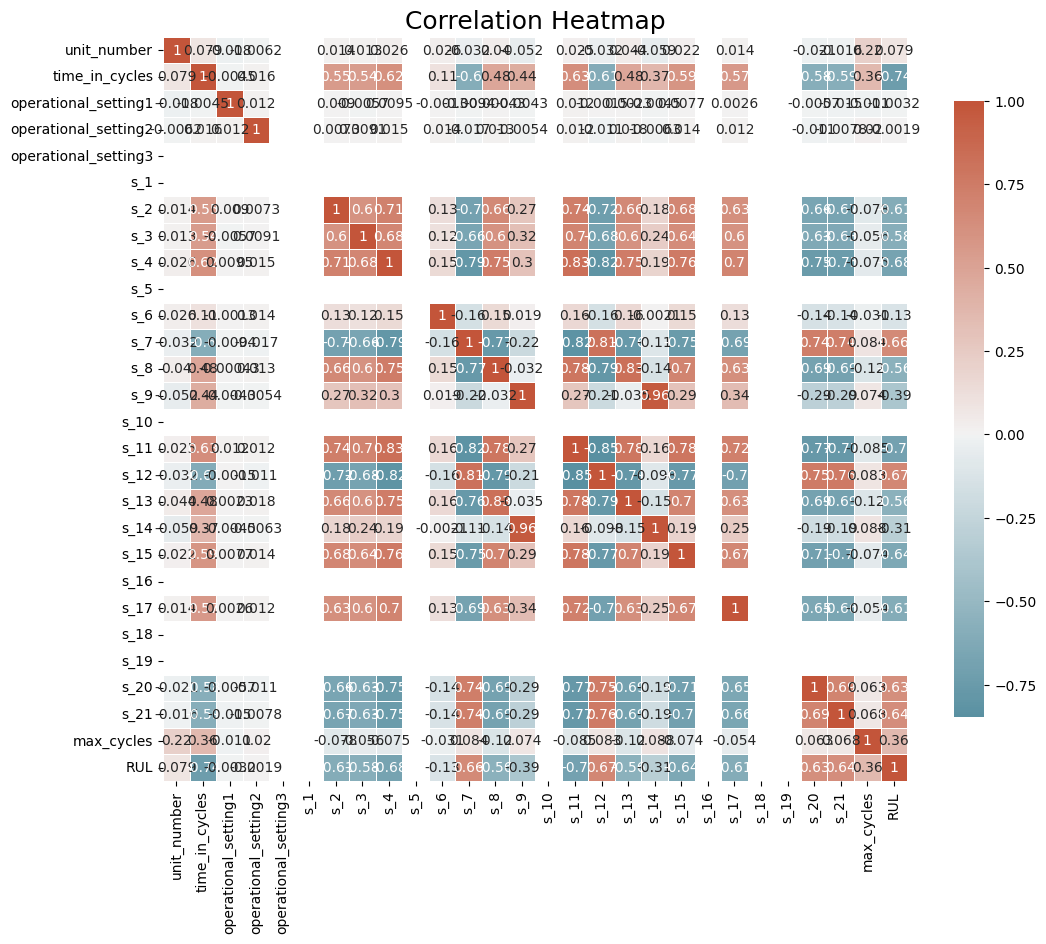

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# 상관 행렬 계산
corr = train.corr()

# 히트맵 생성
plt.figure(figsize=(12, 10))
cmap = sns.diverging_palette(220, 20, as_cmap=True)  # 파란색에서 빨간색으로 색상 조정
sns.heatmap(corr, annot=True, cmap=cmap, center=0, square=True, cbar_kws={"shrink": .8}, linewidths=.5)
plt.title('Correlation Heatmap', size=18)
plt.show()

# 절대값 0.5 이하의 상관 관계를 가진 s_9 와 s_14 를 제거하면 r2 스코어가 20% 가량 감소한다.

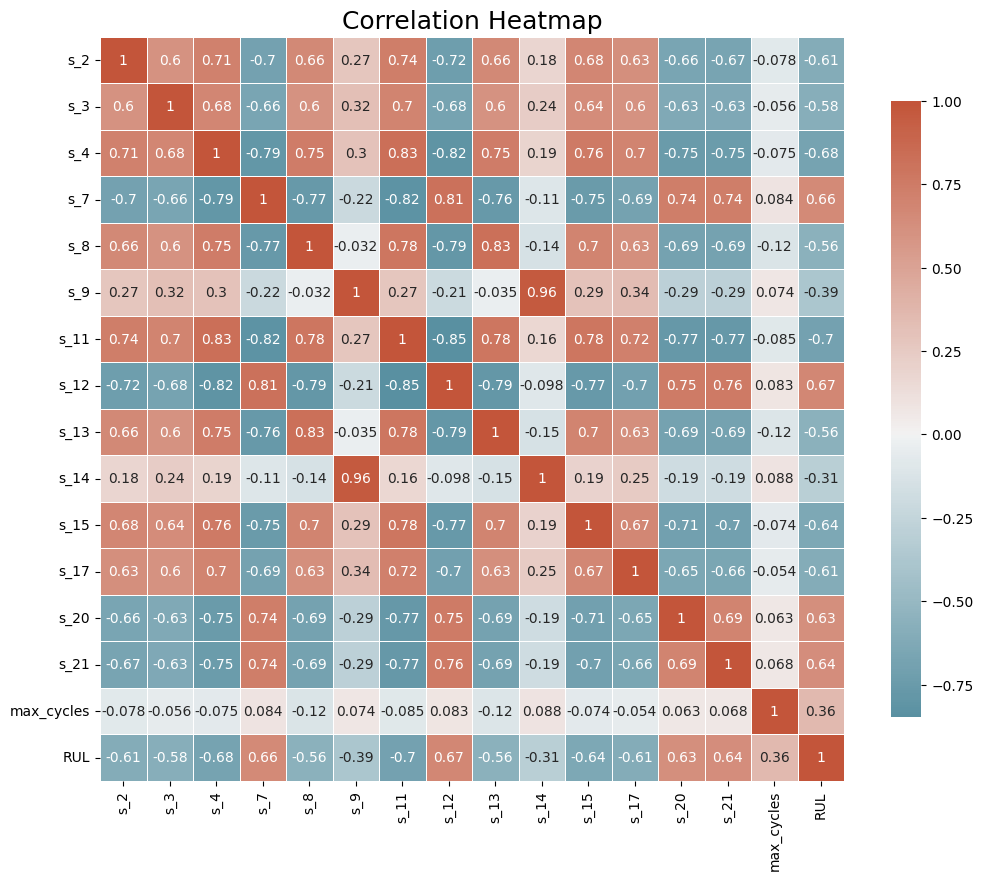

In [34]:
# 상관 행렬 계산
corr = train.corr()

# 히트맵 생성
plt.figure(figsize=(12, 10))
cmap = sns.diverging_palette(220, 20, as_cmap=True)  # 파란색에서 빨간색으로 색상 조정
sns.heatmap(corr, annot=True, cmap=cmap, center=0, square=True, cbar_kws={"shrink": .8}, linewidths=.5)
plt.title('Correlation Heatmap', size=18)
plt.show()

# 절대값 0.5 이하의 상관 관계를 가진 s_9 와 s_14 를 제거하면 r2 스코어가 20% 가량 감소한다.

### 3-2. Normalization & Standardization
#### Normalization
- 장점
    - 모든 피처가 동일한 스케일을 가지므로 거리 기반 알고리즘에서 성능이 향상될 수 있다.
    - 신경망과 같은 모델에서 빠른 수렴을 도울 수 있다.
- 단점
    - 이상치가 있는 경우 이상치에 의해 스케일이 왜곡될 수 있다.
    - 데이터의 분포가 비선형일 경우, 모델의 성능이 저하될 수 있다.  

In [16]:
# min-max scaler 함수 정의
def min_max_scaling(df):
    return (df - df.min()) / (df.max() - df.min()) 

In [17]:
# divide dataset 
y = train['RUL']
X = train.drop('RUL', axis=1)
print('X=', X.shape, 'Y=', y.shape)

X= (20631, 27) Y= (20631,)


In [18]:
X_normalized = X.copy()
X_normalized[X.columns] = min_max_scaling(X_normalized[X.columns])
display(X_normalized.describe().T)

,count,mean,std,min,25%,50%,75%,max
unit_number,20631.0,0.510167,0.295229,0.0,0.252525,0.515152,0.767677,1.0
time_in_cycles,20631.0,0.298637,0.190806,0.0,0.141274,0.285319,0.429363,1.0
operational_setting1,20631.0,0.499490,0.125708,0.0,0.413793,0.500000,0.586207,1.0
operational_setting2,20631.0,0.501959,0.244218,0.0,0.333333,0.500000,0.750000,1.0
operational_setting3,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
s_1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
s_2,20631.0,0.443052,0.150618,0.0,0.335843,0.430723,0.539157,1.0
s_3,20631.0,0.424746,0.133664,0.0,0.331807,0.415522,0.508829,1.0
s_4,20631.0,0.450435,0.151935,0.0,0.339467,0.435348,0.545324,1.0
s_5,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Standardization
- 장점
    - 데이터 분포가 정규 분포를 따를 때, 많은 통계적 기법과 머신러닝 알고리즘에서 효과적이다.
    - 이상치의 영향을 상대적으로 덜 받는다. 
- 단점
    - 데이터의 실제 범위에 대한 정보를 잃기 때문에 해석이 어려울 수 있다.
    - 신경망과 같은 특정 모델에서는 정규화가 더 효과적일 수 있다.

#### Cross Validation
- operattional_setting 변수를 넣은 모델과 그렇지 않은 모델 비교
- 정규화한 데이터를 사용한 모델과 표준화한 데이터를 사용한 모델 비교 

## 4. Model Development
- 일반적인 회귀 모델로 학습 및 평가
- 새롭게 제안하는 모델로 학습 및 평가
- 비교

####  결정 계수 R2 score(R-squared)
- 회귀 분석의 성능 평가 척도 중 하나로 독립 변수가 종속 변수를 얼마나 잘 설명하는 지를 나타낸다.
- 0과 1 사이의 값을 가지며, 상관계수가 높을 수록 1에 가까워지고 이는 모델의 설명력이 높다고 볼 수 있다.  
  (ex. R2 값이 0.3 이라면 모델이 약 30% 의 설명력을 가진다고 해석할 수 있다.)
- 결정 계수는 독립 변수가 많을 수록 커지기 때문에 독립 변수가 2개 이상일 경우 조정된 결정계수를 사용해야 한다.   
  ![img](./img/img.jpg)
#### R2 score 와 "실효성 있는 모델" 의 기준 
1. 도메인 및 문제의 복잡성: 
- 어떤 도메인에서는 0.3 ~ 0.5 의 r2 도 유용할 수 있다.  
  예를 들어 인간 행동을 예측하는 모델의 경우 본질적으로 예측하기 어려운 영역이 많기 때문에 상대적으로 낮은 r2 도 수용된다.
- 반면 물리적 법칙이 잘 정의된 문제나 예측 가능한 시스템에서는 0.9 이상의 높은 R2 를 기대한다.
2. 데이터의 변동성:
- 데이터 자체에 변동성이 많거나 노이즈가 큰 경우, R2 값이 낮아질 수 있다.
- 이러한 경우, 모델의 상대적인 성능을 다른 모델과 비교하는 것이 중요하다.
3. 비즈니스 요구 사항:
- 특정 비즈니스 요구 사항에 따라, r2 가 낮더라도 실용적인 가치를 가질 수 있다.  
  예를 들어, 비용 절감이나 효율성 개선이 목표라면, 낮은 R2 로도 충분한 성과를 낼 수 있다.
4. 대체 모델과의 비교: 
- 모델의 성능은 항상 대체모델(예: 기존 모델, 간단한 베이스라인 모델)과 비교하여 평가해야 한다.
- 베이스랑니모델보다 나은 성능을 보인다면, r2 가 낮더라도 실용적일 수 있다.
- 일반적인 기준:  
    - 0.7 이상: 모델이 데이터를 잘 설명한다고 간주되는 경우가 많다.
    - 0.5 이상: 보통 적당한 설명력을 가진다고 볼 수 있으며, 도메인에 따라 유용할 수 있다.
    - 0.5 미만: 설명력이 낮다고 볼 수 있지만, 특정 상황에서는 여전히 가치있을 수 있다.
    - 음수: 전혀 설명하지 못하고 있다.
R2 score 가 0.6 이상이면 좋다고 할 수 있음.

In [19]:
# 데이터 분할
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

### 4-1. Ridege Regression

In [39]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score

from sklearn.linear_model import Ridge

# 하이퍼파라미터 그리드 정의
ridge_param_grid = {
    'alpha': [0.1, 1.0, 10.0, 100.0]  # 정규화 강도
}

# Ridge 모델 생성
ridge_model = Ridge(random_state=42)

# GridSearchCV를 사용하여 하이퍼파라미터 튜닝
ridge_grid_search = GridSearchCV(ridge_model, ridge_param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)
ridge_grid_search.fit(X_train, y_train)

# 최적의 하이퍼파라미터
print("Best parameters found for Ridge Regression: ", ridge_grid_search.best_params_)

# 최적 모델로 예측
best_ridge = ridge_grid_search.best_estimator_
pred_ridge = best_ridge.predict(X_test)

# 성능 평가
mse_ridge = mean_squared_error(y_test, pred_ridge)
mape_ridge = mean_absolute_percentage_error(y_test, pred_ridge)
r2_ridge = r2_score(y_test, pred_ridge)

print(f"Ridge Regression 최적화 후 MSE: {mse_ridge}")
print(f"Ridge Regression 최적화 후 MAPE: {mape_ridge}")
print(f"Ridge Regression 최적화 후 R2: {r2_ridge}")

Fitting 3 folds for each of 4 candidates, totalling 12 fits
Best parameters found for Ridge Regression:  {'alpha': 1.0}
Ridge Regression 최적화 후 MSE: 1511.5471908231677
Ridge Regression 최적화 후 MAPE: 755729342585870.9
Ridge Regression 최적화 후 R2: 0.6691584652898209


### 4-2. Lasso Regression

In [40]:
from sklearn.linear_model import Lasso

# 하이퍼파라미터 그리드 정의
lasso_param_grid = {
    'alpha': [0.1, 1.0, 10.0, 100.0]  # 정규화 강도
}

# Lasso 모델 생성
lasso_model = Lasso(random_state=42)

# GridSearchCV를 사용하여 하이퍼파라미터 튜닝
lasso_grid_search = GridSearchCV(lasso_model, lasso_param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)
lasso_grid_search.fit(X_train, y_train)

# 최적의 하이퍼파라미터
print("Best parameters found for Lasso Regression: ", lasso_grid_search.best_params_)

# 최적 모델로 예측
best_lasso = lasso_grid_search.best_estimator_
pred_lasso = best_lasso.predict(X_test)

# 성능 평가
mse_lasso = mean_squared_error(y_test, pred_lasso)
mape_lasso = mean_absolute_percentage_error(y_test, pred_lasso)
r2_lasso = r2_score(y_test, pred_lasso)

print(f"Lasso Regression 최적화 후 MSE: {mse_lasso}")
print(f"Lasso Regression 최적화 후 MAPE: {mape_lasso}")
print(f"Lasso Regression 최적화 후 R2: {r2_lasso}")

Fitting 3 folds for each of 4 candidates, totalling 12 fits
Best parameters found for Lasso Regression:  {'alpha': 0.1}
Lasso Regression 최적화 후 MSE: 1514.825347345853
Lasso Regression 최적화 후 MAPE: 717249131316896.6
Lasso Regression 최적화 후 R2: 0.668440955216983


### 4-3. RandomForestRegressor

In [42]:
from sklearn.ensemble import RandomForestRegressor

# 하이퍼파라미터 그리드 정의
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# RandomForestRegressor 모델 생성
rf_model = RandomForestRegressor(random_state=42)

# GridSearchCV를 사용하여 하이퍼파라미터 튜닝
rf_grid_search = GridSearchCV(rf_model, rf_param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)
rf_grid_search.fit(X_train, y_train)

# 최적의 하이퍼파라미터
print("Best parameters found for RandomForestRegressor: ", rf_grid_search.best_params_)

# 최적 모델로 예측
best_rf = rf_grid_search.best_estimator_
pred_rf = best_rf.predict(X_test)

# 성능 평가
mse_rf = mean_squared_error(y_test, pred_rf)
mape_rf = mean_absolute_percentage_error(y_test, pred_rf)
r2_rf = r2_score(y_test, pred_rf)

print(f"RandomForestRegressor 최적화 후 MSE: {mse_rf}")
print(f"RandomForestRegressor 최적화 후 MAPE: {mape_rf}")
print(f"RandomForestRegressor 최적화 후 R2: {r2_rf}")

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best parameters found for RandomForestRegressor:  {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
RandomForestRegressor 최적화 후 MSE: 806.8367278036184
RandomForestRegressor 최적화 후 MAPE: 73034100396040.5
RandomForestRegressor 최적화 후 R2: 0.8234027340279605


### 4-4. XGBoost

In [43]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor

# 하이퍼파라미터 그리드 정의
param_dist = {
    'n_estimators': [100, 200, 300, 500],
    'learning_rate': [0.01, 0.03, 0.1, 0.2],
    'max_depth': [4, 6, 8, 10],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# XGBoost 모델 생성
xgb_model = XGBRegressor(random_state=42)

# RandomizedSearchCV 사용
random_search = RandomizedSearchCV(xgb_model, param_distributions=param_dist, n_iter=10, cv=3, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2, random_state=42)
random_search.fit(X_train, y_train)

# 최적의 하이퍼파라미터
print("Best parameters found: ", random_search.best_params_)

# 최적 모델로 예측
best_xgb = random_search.best_estimator_
pred_xgb = best_xgb.predict(X_test)

# 성능 평가
mse_xgb = mean_squared_error(y_test, pred_xgb)
mape_xgb = mean_absolute_percentage_error(y_test, pred_xgb)
r2_xgb = r2_score(y_test, pred_xgb)
print(f"XGBoost 최적화 후 MSE: {mse_xgb}")
print(f"XGBoost 최적화 후 MAPE: {mape_xgb}")
print(f"XGBoost 최적화 후 R2: {r2_xgb}")

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best parameters found:  {'subsample': 0.8, 'n_estimators': 500, 'max_depth': 8, 'learning_rate': 0.03, 'colsample_bytree': 0.6}
XGBoost 최적화 후 MSE: 653.869909810394
XGBoost 최적화 후 MAPE: 80009109442720.0
XGBoost 최적화 후 R2: 0.8568835258483887


In [ ]:
# Auto ML
from tpot import TPOTRegressor

# TPOT Regressor 생성
tpot = TPOTRegressor(verbosity=2, generations=5, population_size=20, random_state=42)

# 모델 학습
tpot.fit(X_train, y_train)

# 최적의 모델로 예측
pred_tpot = tpot.predict(X_test)

# 성능 평가
mse_tpot = mean_squared_error(y_test, pred_tpot)
mape_tpot = mean_absolute_percentage_error(y_test, pred_tpot)
r2_tpot = r2_score(y_test, pred_tpot)

print(f"TPOT 최적화 후 MSE: {mse_tpot}")
print(f"TPOT 최적화 후 MAPE: {mape_tpot}")
print(f"TPOT 최적화 후 R2: {r2_tpot}")

# 최적의 모델을 Python 코드로 export
# tpot.export('best_model_pipeline.py') -> r2: 0.524 (XGB 와 큰 차이 없음)

In [46]:
# asymmetric_scoring 함수는 조기 예측과 늦은 예측에 대해 서로 다른 가중치를 적용하여 스코어를 계산한다. (조기 예측 가중치 a1, 늦은 예측 가중치 a2)
def asymmetric_scoring(y_true, y_pred, a1=10, a2=13):
    """
    비대칭 스코어링 함수
    y_true: 실제 RUL 값 (numpy array)
    y_pred: 예측된 RUL 값 (numpy array)
    a1: 조기 예측에 대한 가중치
    a2: 늦은 예측에 대한 가중치
    """
    errors = y_pred - y_true
    scores = np.where(errors < 0, np.exp(-errors / a1) - 1, np.exp(errors / a2) - 1)
    return np.sum(scores)

# evaluate_algorithm 함수는 여러 UUT 에 대해 총 스코어를 계산한다.
def evaluate_algorithm(y_true_all, y_pred_all, a1=10, a2=13):
    """
    알고리즘 평가 함수
    y_true_all: 실제 RUL 값 리스트 (각 UUT별 numpy array)
    y_pred_all: 예측된 RUL 값 리스트 (각 UUT별 numpy array)
    a1: 조기 예측에 대한 가중치
    a2: 늦은 예측에 대한 가중치
    """
    total_score = 0

    for y_true, y_pred in zip(y_true_all, y_pred_all):
        score = asymmetric_scoring(y_true, y_pred, a1, a2)
        total_score += score
    
    return total_score

total_score = evaluate_algorithm(y_test, pred_xgb)
print(f"Total Score: {total_score}")

# 이 시스템에서 점수는 음수를 포함할 수 있으며, 예측이 정확할수록 점수는 작아진다. (예측이 전혀 맞지 않으면 점수가 커진다.)

Total Score: 2475574.3984331903
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   3.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=  13.2s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=  12.9s
[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   2.9s
[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=  11.5s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   2.4s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   4.8s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   5.0s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   4.8s
[CV] END max_depth=10, min_samples_leaf=2, min_samp

### 4-5. SVR

In [44]:
from sklearn.svm import SVR

# 하이퍼파라미터 그리드 정의
param_grid = {
    'C': [0.1, 1, 10, 100],
    'epsilon': [0.01, 0.1, 0.2, 0.5],
    'kernel': ['linear', 'rbf']  # SVM 커널 선택: 선형 또는 RBF
}

# SVM(SVR) 모델 생성
svr_model = SVR()

# GridSearchCV를 사용하여 하이퍼파라미터 튜닝
grid_search = GridSearchCV(svr_model, param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# 최적의 하이퍼파라미터
print("Best parameters found: ", grid_search.best_params_)

# 최적 모델로 예측
best_svr = grid_search.best_estimator_
pred_svr = best_svr.predict(X_test)

# 성능 평가
mse_svr = mean_squared_error(y_test, pred_svr)
mape_svr = mean_absolute_percentage_error(y_test, pred_svr)
r2_svr = r2_score(y_test, pred_svr)

print(f"SVM 최적화 후 MSE: {mse_svr}")
print(f"SVM 최적화 후 MAPE: {mape_svr}")
print(f"SVM 최적화 후 R2: {r2_svr}")

Fitting 3 folds for each of 32 candidates, totalling 96 fits
Best parameters found:  {'C': 100, 'epsilon': 0.5, 'kernel': 'rbf'}
SVM 최적화 후 MSE: 1027.6007382939883
SVM 최적화 후 MAPE: 50766728048878.62
SVM 최적화 후 R2: 0.7750827712224111


### 4-6. kNN

In [45]:
from sklearn.neighbors import KNeighborsRegressor

# 하이퍼파라미터 그리드 정의
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],  # k 값, 이웃의 수
    'weights': ['uniform', 'distance'],  # 가중치 방식: uniform은 동일한 가중치, distance는 거리에 반비례한 가중치
    'p': [1, 2]  # 거리 측정 방식: 1은 맨해튼 거리, 2는 유클리드 거리
}

# kNN 모델 생성
knn_model = KNeighborsRegressor()

# GridSearchCV를 사용하여 하이퍼파라미터 튜닝
grid_search = GridSearchCV(knn_model, param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# 최적의 하이퍼파라미터
print("Best parameters found: ", grid_search.best_params_)

# 최적 모델로 예측
best_knn = grid_search.best_estimator_
pred_knn = best_knn.predict(X_test)

# 성능 평가
mse_knn = mean_squared_error(y_test, pred_knn)
mape_knn = mean_absolute_percentage_error(y_test, pred_knn)
r2_knn = r2_score(y_test, pred_knn)

print(f"kNN 최적화 후 MSE: {mse_knn}")
print(f"kNN 최적화 후 MAPE: {mape_knn}")
print(f"kNN 최적화 후 R2: {r2_knn}")

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best parameters found:  {'n_neighbors': 11, 'p': 1, 'weights': 'distance'}
kNN 최적화 후 MSE: 1021.4641889921567
kNN 최적화 후 MAPE: 67921225047314.516
kNN 최적화 후 R2: 0.7764259151223625


### (논문) k-NN을 활용한 터보팬 엔진의 잔여 유효 수명 예측 모델 제안
#### 모델링 
- RUL 예측 모델은 [데이터 전처리 -> 데이터 변환 -> k-최근접 이웃 기법] 으로 구성되었다.
- **데이터 전처리** 
    - RUL 임계값 설정
      RUL 의 예측 목적은 고장을 사전에 예측하여 시기적절한 조치를 취하는 것이다.  
      따라서 모델의 관심 대상은 고장 시점에 근점하며, 고장의 전조를 확인할 수 있는 사이클이다.
      이를 고려하여 모델을 구성할 때, 학습 데이터의 RUL 임계값을 130으로 설정하였다.
      임계값을 초과하는 비관심 데이터의 경우, 수명을 임계값으로 조정하여 분석하였다.
      (RUL 이 130 을 초과하면 130 으로 맞췄다는 말인 것 같다.)  
      
    - 이동 평균 필터(Moving Average Filter)  
      이동 평균 필터는 데이터의 변동성을 줄이고, 신호의 노이지를 감소시키기 위해
      사용되는 데이터 처리 기법이다. 일반적으로 시계열 데이터에서 자주 사용된다.
      이동 평균 필터는 주어진 데이터 포인트의 일정한 윈도우(기간)을 설정하고,
      그 윈도우 안의 데이터 값들의 평균을 계산하여 새로운 값을 생성한다.
      장점으로는 노이즈 감소, 트렌드 파악, 단순함이 있다.
      단점으로는 지연, 정보 손실, 고정된 윈도우가 있다.
      종류
      - 단순 이동 평균: 모든 데이터 포인트에 동일한 가중치 부여
      - 가중 이동 평균: 최근 데이터 포인트에 더 높은 가중치를 부여하여 평균 계산
      - 지수 이동 평균: 과거 데이터에 지수적으로 감소하는 가중치를 부여하는 평균 계산
    - 표준화
      z-score 표준화를 진행하였다. 데이터를 평균이 0이고 표준 편차가 1인 정규 분포로 변환한다. 
- **데이터 변환** (전처리 데이터 주성분 분석 -> 주성분 맵 형성)
    - 고차원의 데이터의 경우 시각화가 어려워, 변수 간의 상관관계 파악이 어렵다.
      따라서 주성분 분석을 통해 정보의 손실을 최소화하여 데이터의 차원을 축소하였다.
    - 주성분 분석
      먼저 14개 센서를 입력 벡터 x로 구성하고, 입력 벡터 x 의 공분산 행렬을 구한다.
      고유값에 따라 고유 백터를 내림 차순으로 정렬한다. (14개의 주성분을 모두 사용했을때 성능 좋음)  
       
- k-NN 활용 RUL 산출  
  ![image1.png](./img/img1.png)

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# read data
# define filepath to read dataset
data_path = './dataset/'

# define column names for easy indexing
index_names = ['unit_number', 'time_in_cycles']
setting_names = ['operational_setting1', 'operational_setting2', 'operational_setting3']
sensor_names = ['s_{}'.format(i) for i in range(1,22)]
col_names = index_names + setting_names + sensor_names

train_FD001 = pd.read_csv((data_path+'train_FD001.txt'), sep=r'\s+', header=None, names=col_names)
RUL_FD001 = pd.read_csv((data_path+'RUL_FD001.txt'), sep=r'\s+', header=None, names=['RUL'])
test_FD001 = pd.read_csv((data_path+'test_FD001.txt'), sep=r'\s+', header=None, names=col_names)

# train_FD001.to_csv('train_FD001.csv', index=False)
# test_FD001.to_csv('test_FD001.csv', index=False)
# RUL_FD001.to_csv('RUL_FD001.csv', index=False)

# 각 unit_number 별 max_cycle 계산
max_cycles = train_FD001.groupby('unit_number')['time_in_cycles'].max().reset_index()
max_cycles.columns = ['unit_number', 'max_cycles']
# train_FD001 에 max_cycles 정보를 병합
train = train_FD001.merge(max_cycles[['unit_number', 'max_cycles']], on='unit_number', how='left')
# 각행의 RUL 계산
train['RUL'] = train['max_cycles'] - train['time_in_cycles']


# 각 unit_number 별 max_cycle 계산
max_cycles_test = test_FD001.groupby('unit_number')['time_in_cycles'].max().reset_index()
max_cycles_test.columns = ['unit_number', 'max_cycles']
# max_cycle 에 RUL_FD001 을 더하여 전체 수명 계산
max_cycles_test['max_life'] = max_cycles_test['max_cycles'] + RUL_FD001['RUL']
# train_FD001 에 max_cycles 정보를 병합
test = test_FD001.merge(max_cycles_test[['unit_number', 'max_life']], on='unit_number', how='left')
# 각행의 RUL 계산
test['RUL'] = test['max_life'] - test['time_in_cycles']

# 데이터셋 복사
train_copy = train
test_copy = test

# 데이터 타입 맞춤
train = train.astype({'s_17': 'float64', 's_18': 'float64'})
test = test.astype({'s_17': 'float64', 's_18': 'float64'})

# 표준 편차가 0인 독립 변수 및 사용하지 않는 칼럼, 상관 분석에서 미미한 칼럼 제거 
delete_train_columns = ['operational_setting1', 'operational_setting2', 'operational_setting3', 's_1', 's_5', 's_6', 's_10', 's_16', 's_18', 's_19']
for i in delete_train_columns:
    del train[i]

delete_test_columns = ['max_life', 'operational_setting1', 'operational_setting2', 'operational_setting3', 's_1', 's_5', 's_6', 's_10', 's_16', 's_18', 's_19']
for i in delete_test_columns:
    del test[i]
    
# display(train)

In [84]:
#1. RUL 칼럼에서 130 넘어가면 130 으로 변환 -> 130 이면 너무 낮은거 같은데? (skip)

(191.0, 0.0)

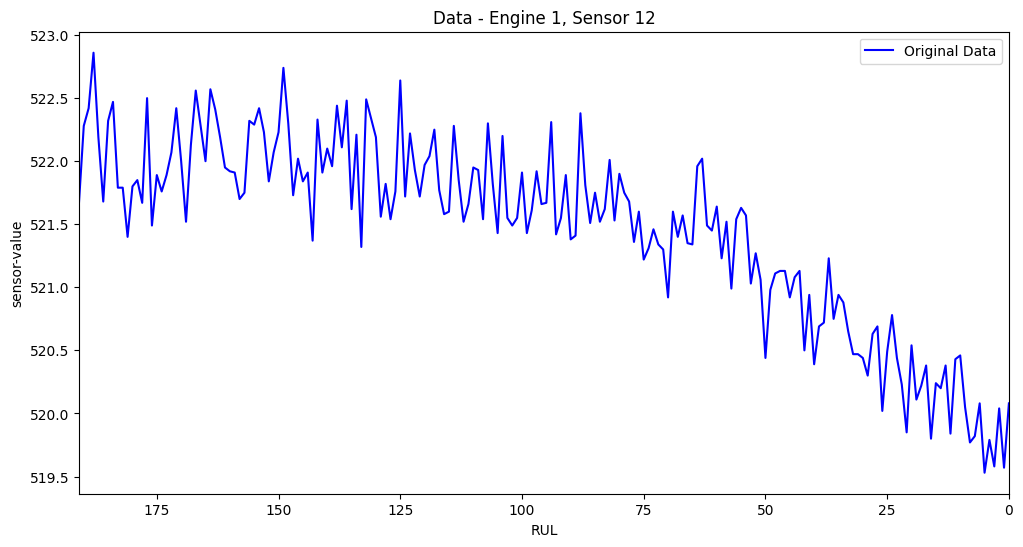

In [31]:
#2. 각 센서 데이터 칼럼에 이동 평균 적용 
## 이동 평균 적용 시점이 중요하다. 데이터에 먼저 이동 평균을 적용하면 데이터 누수(Data leakage)가 발생할 수 있다.
## 데이터를 먼저 학습 데이터와 테스트 데이터로 나눈 후, 각각에 이동 평균을 따로 적용하는 것이 좋다.
## 또한 이동 평균의 윈도우 크기를 선택할 때, 지나치게 큰 값은 최근 정보를 희석시킬 수 있으므로, 적절한 윈도우 키그를 선택하는 것이 중요하다.

# # 이동 평균을 구할 창의 크기 
# window_size = 10

# # 이동 평균 계산: 각 유닛별로 센서 데이터에 대해 이동 평균 적용 
# sensor_columns = ['s_2', 's_3', 's_4', 's_7', 's_8', 's_9', 's_11', 's_12', 's_13', 's_14', 's_15', 's_17', 's_20', 's_21']

# # 고유한 unit_number 값 얻기
# unique_units = train['unit_number'].unique()

# # 각 unit_number 별로 그룹화
# unit_dfs = {unit: train_copy[train_copy['unit_number'] == unit] for unit in unique_units}

# # 각 unit_number 별로 그룹화한 후, 각 센서에 대해 이동평균 계산
# train[sensor_columns] = train.groupby('unit_number')[sensor_columns].transform(lambda x: x.rolling(window=window_size, min_periods=1).mean())

# # unit_number 컬럼 삭제
# del train['unit_number']
#############################################################################################################################################
#이동 평균을 적용하면 초기 몇 개의 데이터 포인트가 누락될 수 있다. 예를 들어, 5개 데이터 포인트의 이동 평균을 계산하면 처음 4개의 데이터는 이동 평균이 계산되지 않는다.

# plt.figure(figsize=(12, 6))
# plt.plot(unit_dfs[unit_num]['time_in_cycles'], unit_dfs[unit_num][sensor], label='Original Data', color='blue')
# plt.plot(unit_dfs[unit_num]['time_in_cycles'], moving_avg, label='Moving Average', color='red', linewidth=2)
# plt.title(f'Data - Engine {unit_num}, Sensor {sensor[2:]}')
# plt.xlabel('time-cycles')
# plt.ylabel('sensor-value')
# plt.legend()
# plt.show()

# 고유한 unit_number 값 얻기
unique_units = train_copy['unit_number'].unique()

# 각 고유한 unit_number에 대해 DataFrame 생성
unit_dfs = {unit: train_copy[train_copy['unit_number'] == unit] for unit in unique_units}

window_size = 10
unit_num = 1
sensor = 's_12'
moving_avg = pd.Series(unit_dfs[unit_num][sensor]).rolling(window=window_size).mean()

plt.figure(figsize=(12, 6))
plt.plot(unit_dfs[unit_num]['RUL'], unit_dfs[unit_num][sensor], label='Original Data', color='blue')
# plt.plot(unit_dfs[unit_num]['RUL'], moving_avg, label='Moving Average', color='red', linewidth=2)
plt.title(f'Data - Engine {unit_num}, Sensor {sensor[2:]}')
plt.xlabel('RUL')
plt.ylabel('sensor-value')
plt.legend()

# x축을 좌우 반전
plt.xlim(unit_dfs[unit_num]['RUL'].max(), unit_dfs[unit_num]['RUL'].min())

(191.0, 0.0)

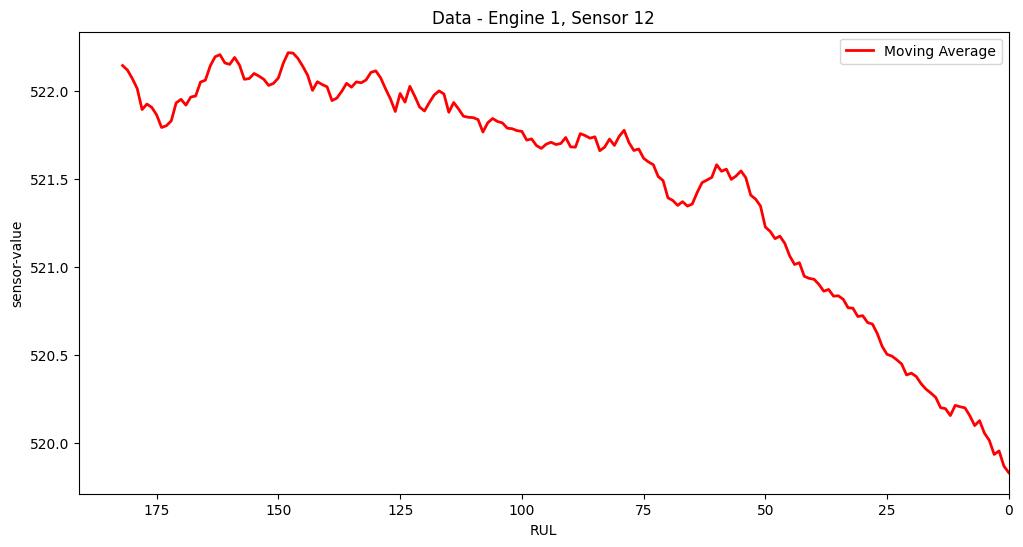

In [32]:
plt.figure(figsize=(12, 6))
# plt.plot(unit_dfs[unit_num]['RUL'], unit_dfs[unit_num][sensor], label='Original Data', color='blue')
plt.plot(unit_dfs[unit_num]['RUL'], moving_avg, label='Moving Average', color='red', linewidth=2)
plt.title(f'Data - Engine {unit_num}, Sensor {sensor[2:]}')
plt.xlabel('RUL')
plt.ylabel('sensor-value')
plt.legend()

# x축을 좌우 반전
plt.xlim(unit_dfs[unit_num]['RUL'].max(), unit_dfs[unit_num]['RUL'].min())

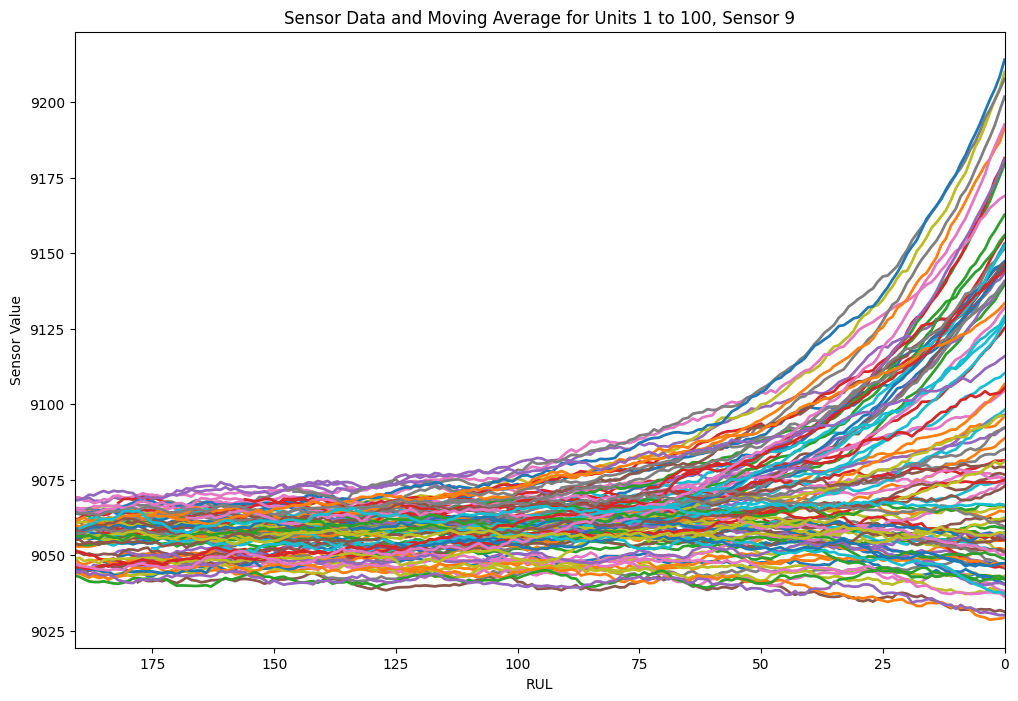

In [118]:
# 고유한 unit_number 값 얻기
unique_units = train_copy['unit_number'].unique()

# 각 고유한 unit_number에 대해 DataFrame 생성
unit_dfs = {unit: train_copy[train_copy['unit_number'] == unit] for unit in unique_units}

window_size = 10
sensor = 's_9'

# 그래프 그리기
plt.figure(figsize=(12, 8))

# 각 unit_number에 대해 루프
for unit_num in range(1, 101):
    if unit_num in unit_dfs:
        # 이동 평균 계산
        moving_avg = pd.Series(unit_dfs[unit_num][sensor]).rolling(window=window_size).mean()
        
        # RUL을 x축으로 설정하여 그래프 그리기
        # plt.plot(unit_dfs[unit_num]['RUL'], unit_dfs[unit_num][sensor], label=f'Unit {unit_num}', alpha=0.5)  # alpha로 투명도 조절
        plt.plot(unit_dfs[unit_num]['RUL'], moving_avg, linewidth=2)

# 그래프 제목 및 축 레이블 설정
plt.title(f'Sensor Data and Moving Average for Units 1 to 100, Sensor {sensor[2:]}')
plt.xlabel('RUL')
plt.ylabel('Sensor Value')
# plt.grid(True)
plt.xlim(unit_dfs[1]['RUL'].max(), unit_dfs[1]['RUL'].min())  # x축 반전
plt.show()

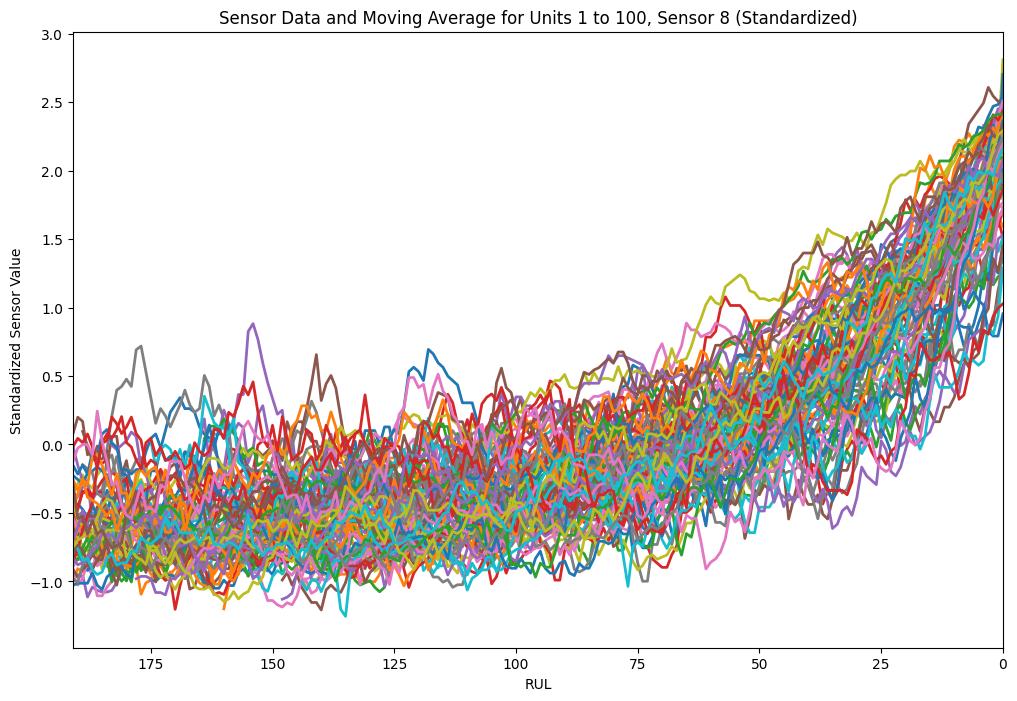

In [37]:
# 표준화 추가버전
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# 고유한 unit_number 값 얻기
unique_units = train_copy['unit_number'].unique()

# 각 고유한 unit_number에 대해 DataFrame 생성
unit_dfs = {unit: train_copy[train_copy['unit_number'] == unit] for unit in unique_units}

window_size = 10
sensor = 's_8'

# 그래프 그리기
plt.figure(figsize=(12, 8))

# 각 unit_number에 대해 루프
for unit_num in range(1, 101):
    if unit_num in unit_dfs:
        # 센서 데이터 표준화
        scaler = StandardScaler()
        sensor_data_scaled = scaler.fit_transform(unit_dfs[unit_num][sensor].values.reshape(-1, 1)).flatten()
        
        # 이동 평균 계산
        moving_avg = pd.Series(sensor_data_scaled).rolling(window=window_size).mean()
        
        # RUL을 x축으로 설정하여 그래프 그리기
        plt.plot(unit_dfs[unit_num]['RUL'], moving_avg, linewidth=2, label=f'Unit {unit_num}')  # 이동 평균 그래프

# 그래프 제목 및 축 레이블 설정
plt.title(f'Sensor Data and Moving Average for Units 1 to 100, Sensor {sensor[2:]} (Standardized)')
plt.xlabel('RUL')
plt.ylabel('Standardized Sensor Value')
# plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1), ncol=1)  # 범례 설정
plt.xlim(unit_dfs[1]['RUL'].max(), unit_dfs[1]['RUL'].min())  # x축 반전
plt.show()

In [92]:
del train['unit_number']
del train['time_in_cycles']

In [93]:
#3. z-score 로 데이터 표준화
from sklearn.preprocessing import StandardScaler

# divide dataset 
y = train['RUL']
X = train.drop('RUL', axis=1)
# print('X=', X.shape, 'Y=', y.shape)

# Z-스코어 표준화 적용
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [94]:
#4. 주성분 분석
# from sklearn.decomposition import PCA

# pca = PCA(n_components=0.63) # 분산의 60%를 설명하는 주성분 수 선택 
# X_pca = pca.fit_transform(X_scaled)  # PCA 변환 적용

In [95]:
# 데이터 분할 시 train_test_split 으로 분할하지 않고, unit_number 를 기준으로 분할하는 것이 좋을 듯 하다.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [96]:
#5. kNN 알고리즘 적용
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
from sklearn.neighbors import KNeighborsRegressor

# 하이퍼파라미터 그리드 정의
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],  # k 값, 이웃의 수
    'weights': ['uniform', 'distance'],  # 가중치 방식: uniform은 동일한 가중치, distance는 거리에 반비례한 가중치
    'p': [1, 2]  # 거리 측정 방식: 1은 맨해튼 거리, 2는 유클리드 거리
}

# kNN 모델 생성
knn_model = KNeighborsRegressor()

# GridSearchCV를 사용하여 하이퍼파라미터 튜닝
grid_search = GridSearchCV(knn_model, param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# 최적의 하이퍼파라미터
print("Best parameters found: ", grid_search.best_params_)

# 최적 모델로 예측
best_knn = grid_search.best_estimator_
pred_knn = best_knn.predict(X_test)

# 성능 평가
mse_knn = mean_squared_error(y_test, pred_knn)
mape_knn = mean_absolute_percentage_error(y_test, pred_knn)
r2_knn = r2_score(y_test, pred_knn)

print(f"kNN 최적화 후 MSE: {mse_knn}")
print(f"kNN 최적화 후 MAPE: {mape_knn}")
print(f"kNN 최적화 후 R2: {r2_knn}")

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best parameters found:  {'n_neighbors': 11, 'p': 1, 'weights': 'distance'}
kNN 최적화 후 MSE: 1033.9946611097043
kNN 최적화 후 MAPE: 73926913523759.14
kNN 최적화 후 R2: 0.773683294414798


In [97]:
# asymmetric_scoring 함수는 조기 예측과 늦은 예측에 대해 서로 다른 가중치를 적용하여 스코어를 계산한다. (조기 예측 가중치 a1, 늦은 예측 가중치 a2)
def asymmetric_scoring(y_true, y_pred, a1=10, a2=13):
    """
    비대칭 스코어링 함수
    y_true: 실제 RUL 값 (numpy array)
    y_pred: 예측된 RUL 값 (numpy array)
    a1: 조기 예측에 대한 가중치
    a2: 늦은 예측에 대한 가중치
    """
    errors = y_pred - y_true
    scores = np.where(errors < 0, np.exp(-errors / a1) - 1, np.exp(errors / a2) - 1)
    return np.sum(scores)

# evaluate_algorithm 함수는 여러 UUT 에 대해 총 스코어를 계산한다.
def evaluate_algorithm(y_true_all, y_pred_all, a1=10, a2=13):
    """
    알고리즘 평가 함수
    y_true_all: 실제 RUL 값 리스트 (각 UUT별 numpy array)
    y_pred_all: 예측된 RUL 값 리스트 (각 UUT별 numpy array)
    a1: 조기 예측에 대한 가중치
    a2: 늦은 예측에 대한 가중치
    """
    total_score = 0

    for y_true, y_pred in zip(y_true_all, y_pred_all):
        score = asymmetric_scoring(y_true, y_pred, a1, a2)
        total_score += score
    
    return total_score

total_score = evaluate_algorithm(y_test, pred_knn)
print(f"Total Score: {total_score}")

# 이 시스템에서 점수는 음수를 포함할 수 있으며, 예측이 정확할수록 점수는 작아진다. (예측이 전혀 맞지 않으면 점수가 커진다.)

Total Score: 7876973.997586664


In [98]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor

# 하이퍼파라미터 그리드 정의
param_dist = {
    'n_estimators': [100, 200, 300, 500],
    'learning_rate': [0.01, 0.03, 0.1, 0.2],
    'max_depth': [4, 6, 8, 10],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# XGBoost 모델 생성
xgb_model = XGBRegressor(random_state=42)

# RandomizedSearchCV 사용
random_search = RandomizedSearchCV(xgb_model, param_distributions=param_dist, n_iter=10, cv=3, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2, random_state=42)
random_search.fit(X_train, y_train)

# 최적의 하이퍼파라미터
print("Best parameters found: ", random_search.best_params_)

# 최적 모델로 예측
best_xgb = random_search.best_estimator_
pred_xgb = best_xgb.predict(X_test)

# 성능 평가
mse_xgb = mean_squared_error(y_test, pred_xgb)
mape_xgb = mean_absolute_percentage_error(y_test, pred_xgb)
r2_xgb = r2_score(y_test, pred_xgb)
print(f"XGBoost 최적화 후 MSE: {mse_xgb}")
print(f"XGBoost 최적화 후 MAPE: {mape_xgb}")
print(f"XGBoost 최적화 후 R2: {r2_xgb}")

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best parameters found:  {'subsample': 0.8, 'n_estimators': 500, 'max_depth': 8, 'learning_rate': 0.03, 'colsample_bytree': 0.6}
XGBoost 최적화 후 MSE: 653.869909810394
XGBoost 최적화 후 MAPE: 80009109442720.0
XGBoost 최적화 후 R2: 0.8568835258483887


## 5. Interpretation of Results

In [99]:
# 1. Read data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# define filepath to read dataset
data_path = './dataset/'

# define column names for easy indexing
index_names = ['unit_number', 'time_in_cycles']
setting_names = ['operational_setting1', 'operational_setting2', 'operational_setting3']
sensor_names = ['s_{}'.format(i) for i in range(1,22)]
col_names = index_names + setting_names + sensor_names

# load data
train_FD001 = pd.read_csv((data_path+'train_FD001.txt'), sep=r'\s+', header=None, names=col_names)
RUL_FD001 = pd.read_csv((data_path+'RUL_FD001.txt'), sep=r'\s+', header=None, names=['RUL'])

# 각 unit_number 별 max_cycle 계산
max_cycles = train_FD001.groupby('unit_number')['time_in_cycles'].max().reset_index()
max_cycles.columns = ['unit_number', 'max_cycles']

# max_cycle 에 RUL_FD001 을 더하여 전체 수명 계산
max_cycles['max_life'] = max_cycles['max_cycles'] + RUL_FD001['RUL']

# train_FD001 에 max_cycles 정보를 병합
train = train_FD001.merge(max_cycles[['unit_number', 'max_life']], on='unit_number', how='left')

# 각행의 RUL 계산
train['RUL'] = train['max_life'] - train['time_in_cycles']

# train 데이터셋 복사
train_copy = train

# 데이터 타입 맞춤
train = train.astype({'s_17': 'float64', 's_18': 'float64'})

# csv 파일로 저장
# train.to_csv('train.csv', index=False)

# 표준 편차가 0인 독립 변수 및 사용하지 않는 칼럼, 상관 분석에서 미미한 칼럼 제거 
delete_columns = ['time_in_cycles', 'max_life', 'operational_setting1', 'operational_setting2', 'operational_setting3', 's_1', 's_5', 's_6', 's_10', 's_16', 's_18', 's_19']
for i in delete_columns:
    del train[i]
    
display(train)

,unit_number,s_2,s_3,s_4,s_7,s_8,s_9,s_11,s_12,s_13,s_14,s_15,s_17,s_20,s_21,RUL
0,1,641.82,1589.70,1400.60,554.36,2388.06,9046.19,47.47,521.66,2388.02,8138.62,8.4195,392.0,39.06,23.4190,303
1,1,642.15,1591.82,1403.14,553.75,2388.04,9044.07,47.49,522.28,2388.07,8131.49,8.4318,392.0,39.00,23.4236,302
2,1,642.35,1587.99,1404.20,554.26,2388.08,9052.94,47.27,522.42,2388.03,8133.23,8.4178,390.0,38.95,23.3442,301
3,1,642.35,1582.79,1401.87,554.45,2388.11,9049.48,47.13,522.86,2388.08,8133.83,8.3682,392.0,38.88,23.3739,300
4,1,642.37,1582.85,1406.22,554.00,2388.06,9055.15,47.28,522.19,2388.04,8133.80,8.4294,393.0,38.90,23.4044,299
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,643.49,1597.98,1428.63,551.43,2388.19,9065.52,48.07,519.49,2388.26,8137.60,8.4956,397.0,38.49,22.9735,24
20627,100,643.54,1604.50,1433.58,550.86,2388.23,9065.11,48.04,519.68,2388.22,8136.50,8.5139,395.0,38.30,23.1594,23
20628,100,643.42,1602.46,1428.18,550.94,2388.24,9065.90,48.09,520.01,2388.24,8141.05,8.5646,398.0,38.44,22.9333,22
20629,100,643.23,1605.26,1426.53,550.68,2388.25,9073.72,48.39,519.67,2388.23,8139.29,8.5389,395.0,38.29,23.0640,21


[CV] END ................n_neighbors=3, p=2, weights=uniform; total time=   0.2s
[CV] END ................n_neighbors=5, p=1, weights=uniform; total time=   0.8s
[CV] END ................n_neighbors=7, p=2, weights=uniform; total time=   0.2s
[CV] END ................n_neighbors=9, p=1, weights=uniform; total time=   0.9s
[CV] END ...............n_neighbors=11, p=2, weights=uniform; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=10, n_estimators=300, subsample=0.6; total time=   6.2s
[CV] END ................n_neighbors=3, p=2, weights=uniform; total time=   0.7s
[CV] END ................n_neighbors=5, p=1, weights=uniform; total time=   1.1s
[CV] END ................n_neighbors=7, p=1, weights=uniform; total time=   1.1s
[CV] END ................n_neighbors=9, p=2, weights=uniform; total time=   0.7s
[CV] END ...............n_neighbors=11, p=1, weights=uniform; total time=   1.1s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, n_estimato

### 이동 평균 적용 시점
- CMAPSS 데이터셋을 사용하여 RUL 을 예측할 때, 전체 데이터에 먼저 이동 평균을 적용한 후 학습 데이터와 테스트 데이터로 나누는 것은 주의가 필요하다.

#### 데이터 특성의 이해:
- CMAPSS 데이터셋은 항공기 엔진의 상태를 나타내는 시계열 데이터이다. 이 데이터에는 센서 노이즈, 계측 오차 등이 포함될 수 있다.
#### 이동 평균의 목적:
- 이동 평균은 데이터의 노이즈를 줄이고 트렌드를 명확히 하기 위해 사용된다. 이는 모델이 실제 패턴을 더 잘 학습할 수 있도록 돕는다.
- 이동 평균을 적용하는 이유는 주로 노이즈를 줄이고 시계열 데이터의 패턴을 더 명확하게 만드는 것이다.
#### 데이터 분할 전처리:
- 일반적으로 데이터 전처리는 학습 데이터와 테스트 데이터 분할 전에 수행된다. 이는 모델이 전처리된 데이터에 대한 일관된 학습을 보장히기 위함이다.
#### 시계열 데이터의 특성:
- 시계열 데이터의 경우, 이동 평균을 적용할 때 시간적 연속성과 데이터의 순서를 유지해야 한다.
#### 테스트 데이터의 독립성:
- 테스트 데이터는 모델 평가를 위해 사용되며, 이 데이터는 학습 과정에서 영향을 받지 않아야 한다.
- 이동 평균을 전체 데이터에 적용하면 테스트 데이터가 학습 데이터의 정보를 간접적으로 포함할 가능성이 있다.

#### 결론:
- 전체 데이터에 이동 평균 적용 후 분할:
    - 이 방법은 간단하지만, 테스트 데이터의 독립성을 약화시킬 수 있다.
    - 데이터 누설이 있을 수 있다. 특히 시계열 데이터의 경우, 미래 데이터가 과거 데이터에 영향을 주는 것은 이상적이지 않다.
- 학습 데이터에만 이동 평균 적용 후 분할:
    - 이 방법이 더 안전하다. 학습 데이터에만 이동평균을 적용한 후, 원본 데이터를 기반으로 테스트 데이터를 분리하는 것이 좋다.
      이렇게 하면 테스틑 데이터의 독립성을 유지할 수 있다.

#### 추천:
- 학습 데이터에 이동평균 적용 후 분할:
  1. 전체 데이터를 학습 데이터와 테스트 데이터로 나눈다.
  2. 학습 데이터에만 이동 평균을 적용한다.
  3. 테스트 데이터는 원본 그대로 사용한다.
 
### 모델 적응성 문제
- 학습 데이터에만 이동 평균을 적용하고 테스트 데이터는 원본 그대로 사용하는 접근방법의 경우 모델의 적응성이 떨어질 수 있다.

#### 크로스 밸리데이션:
- 데이터를 여러 폴드로 나누어, 각 폴드를 차례로 테스트 데이터로 사용하면서 학습 데이터에 이동 평균을 적요한다.
- 이를 통해 모델이 다양한 데이터 패턴에 적응할 수 있도록 한다.

#### 이동 평균의 파라미터 조정:
- 이동 평균의 윈도우 크기나 다른 파라미터를 조정하여, 모델이 원본 데이터의 변동성에도 어느 정도 대응할 수 있도록 한다.
- 예를 들어 작은 우니도우 크기나 가중 이동 평균을 사용할 수 있따.

#### 데이터 증강:
- 학습 데이터에 노이즈를 추가하거나, 원본 데이터의 특성을 유지하면서 변형된 데이터를 추가하여 모델이 다양한 상황에 대처할 수 있도록 한다.

#### 정규화 및 표준화:
- 학습 데이터와 테스트 데이터 모두 동일한 정규화 또는 표준화 방법을 사용하여, 데이터의 스케일 차이로 인한 문제를 최소화 한다.

#### 모델의 복잡성 조절:
- 모델의 복잡성을 조절하여 과적합을 방지한다. 예를 들어, 더 단순한 모델을 사용하거나 정규화(L1, L2) 기법을 적용할 수 있다.

#### 시계열 데이터의 특성 활용 (V)
- 시계열 데이터의 특성을 고려하여, 예측값을 계산할 때 이동 평균을 적용하는 방법을 모델 내부에 포함시킬 수 있다.
- 이는 모델이 원본 데이터의 변동성을 이해하고 변영하도록 한다.

#### 올라인 학습 또는 적응적 모델:
- 모델을 배포한 후에도 새로운 데이터를 기반으로 모델을 지속적으로 업데이트하는 온라인 학습 기법을 사용할 수 있다.
- 이는 모델이 실제 운영 환경의 변화를 적응할 수 있도록 한다.

#### 이중 모델 접근법: (V)
- 하나의 모델은 이동 평균 적용된 데이터를 학습하고, 다른 모델은 원본 데이터를 학습하도록 한다.
- 최종 예측 시 두 모델의 결과를 결합하여 보다 안정적인 예측을 얻을 수 있다.

#### 검증 데이터의 사용:
- 학습 데이터에서 별도의 검증 데이터셋을 분리하여, 모델이 이동 평균 적용 후에도 원본 데이터에 대해 어느정도 일반화할 수 있는지 확인한다.

In [ ]:
# 2. divide train-dataset from test-dataset
